In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

### __1. Criando Sianais para Treinamento__

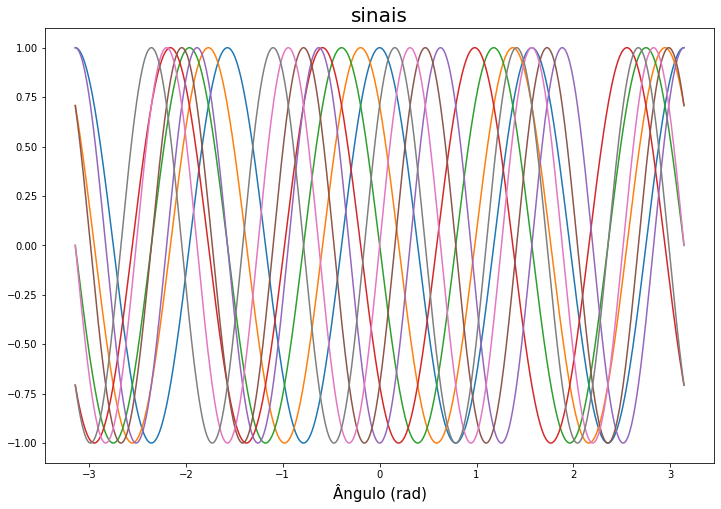

In [2]:
# Sinais variando de -pi a pi 
x = np.linspace(-np.pi, np.pi, 1001)
y1 = np.cos(4*x + 0*np.pi/4)
y2 = np.cos(4*x + 1*np.pi/4)
y3 = np.cos(4*x + 2*np.pi/4)
y4 = np.cos(4*x + 3*np.pi/4)
y5 = np.cos(5*x + 4*np.pi/4)
y6 = np.cos(5*x + 5*np.pi/4)
y7 = np.cos(5*x + 6*np.pi/4)
y8 = np.cos(5*x + 7*np.pi/4)

plt.figure(figsize=(12,8))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.plot(x, y6)
plt.plot(x, y7)
plt.plot(x, y8)

plt.xlabel('Ângulo (rad)', fontsize = 15)
plt.title('sinais', fontsize = 20)
plt.show()

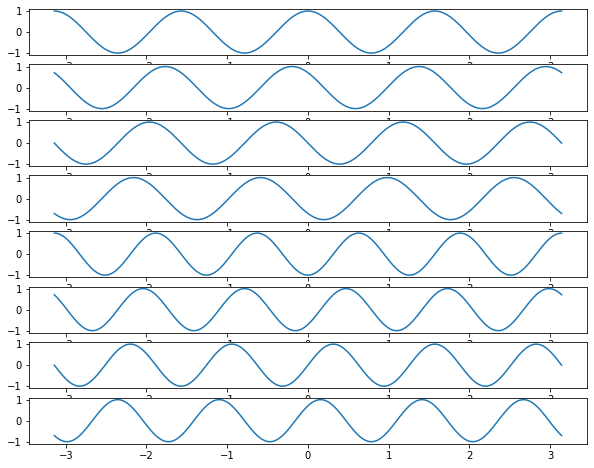

In [4]:
fig, ax = plt.subplots(8,1, figsize = (10,8))

ax[0].plot(x,y1)
ax[1].plot(x,y2)
ax[2].plot(x,y3)
ax[3].plot(x,y4)
ax[4].plot(x,y5)
ax[5].plot(x,y6)
ax[6].plot(x,y7)
ax[7].plot(x,y8)
plt.show()


In [5]:
#Modificando formato para bidimensional(necessário para entrada do autoencoder)
y1 = y1.reshape(-1,1)
y2 = y2.reshape(-1,1)
y3 = y3.reshape(-1,1)
y4 = y4.reshape(-1,1)
y5 = y5.reshape(-1,1)
y6 = y6.reshape(-1,1)
y7 = y7.reshape(-1,1)
y8 = y8.reshape(-1,1)

In [6]:
#Concatenando sinais
df = np.concatenate((y4,y7,y5,y1,y3,y2,y8,y6), axis = 1)

In [7]:
df

array([[-7.07106781e-01, -4.28626380e-16,  1.00000000e+00, ...,
         7.07106781e-01, -7.07106781e-01,  7.07106781e-01],
       [-7.24653130e-01, -3.14107591e-02,  9.99506560e-01, ...,
         6.89113808e-01, -7.28968627e-01,  6.84547106e-01],
       [-7.41741773e-01, -6.27905195e-02,  9.98026728e-01, ...,
         6.70685577e-01, -7.50111070e-01,  6.61311865e-01],
       ...,
       [-6.70685577e-01,  6.27905195e-02,  9.98026728e-01, ...,
         7.41741773e-01, -6.61311865e-01,  7.50111070e-01],
       [-6.89113808e-01,  3.14107591e-02,  9.99506560e-01, ...,
         7.24653130e-01, -6.84547106e-01,  7.28968627e-01],
       [-7.07106781e-01, -9.80336420e-16,  1.00000000e+00, ...,
         7.07106781e-01, -7.07106781e-01,  7.07106781e-01]])

In [8]:
df.shape

(1001, 8)

### __2. Construindo Autoencoder__

In [38]:
#Camada de de entrada e codificação (8x4)
l0 = keras.layers.Dense(4,input_shape = [8])
#Camadade de saída e decodificação (4x8)
l1 = keras.layers.Dense(8,input_shape = [4])


encoder = keras.models.Sequential([l0])

decoder = keras.models.Sequential([l1])

#Concatenando camadas
autoencoder = keras.models.Sequential([encoder, decoder])

#Compilando modelos
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

#Treinando autoencoder - Dados de entradad == Dados de saída
history = autoencoder.fit(df,df,epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 3ms/step - loss: 0.5565
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.2357
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1658
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.1271
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0984
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0691
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0413
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0216
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 13/20
32/32 [==============================

### __3. Reconstruindo Sinais com Autoenconder__

In [39]:
#Sinal codificado
cod = encoder.predict(df)

In [40]:
cod

array([[ 0.08420613, -0.58445126,  0.167162  ,  1.6783975 ],
       [ 0.14329992, -0.5896261 ,  0.14811099,  1.6595719 ],
       [ 0.2024688 , -0.59406924,  0.12903959,  1.639415  ],
       ...,
       [-0.03356163, -0.5719379 ,  0.20516443,  1.7119921 ],
       [ 0.02523611, -0.5785524 ,  0.18618304,  1.695876  ],
       [ 0.08420613, -0.58445126,  0.167162  ,  1.6783975 ]],
      dtype=float32)

In [41]:
cod.shape

(1001, 4)

In [42]:
#sinal decodificado
decod = decoder(cod)
decod

<tf.Tensor: shape=(1001, 8), dtype=float32, numpy=
array([[-7.0800793e-01,  8.8673801e-04,  1.0003636e+00, ...,
         7.0641118e-01, -7.0748681e-01,  7.0620942e-01],
       [-7.2551268e-01, -3.0569553e-02,  9.9985248e-01, ...,
         6.8845046e-01, -7.2932857e-01,  6.8369508e-01],
       [-7.4255931e-01, -6.1995350e-02,  9.9835461e-01, ...,
         6.7005491e-01, -7.5045061e-01,  6.6050589e-01],
       ...,
       [-6.7166781e-01,  6.3766442e-02,  9.9842507e-01, ...,
         7.4098355e-01, -6.6173148e-01,  7.4912494e-01],
       [-6.9005591e-01,  3.2342456e-02,  9.9988776e-01, ...,
         7.2392601e-01, -6.8494707e-01,  7.2802663e-01],
       [-7.0800793e-01,  8.8676781e-04,  1.0003636e+00, ...,
         7.0641118e-01, -7.0748681e-01,  7.0620936e-01]], dtype=float32)>

In [43]:
decod.shape

TensorShape([1001, 8])

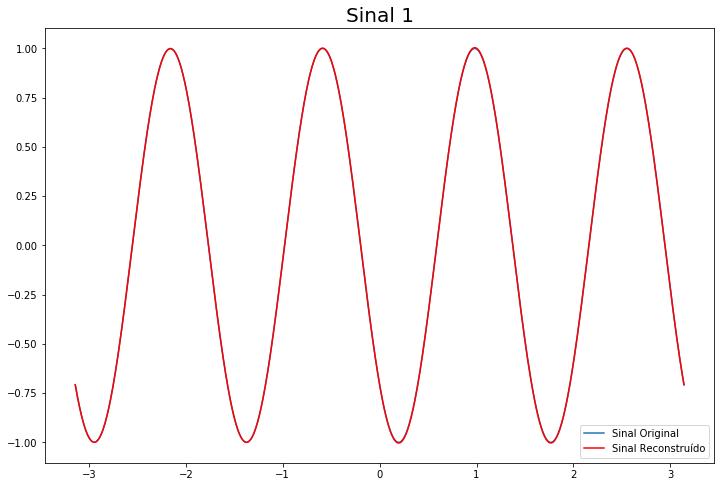

In [44]:
#plot
plt.figure(figsize = (12,8))
plt.plot(x, df[:,0])
plt.plot(x, decod[:,0], color = 'r')
plt.title("Sinal 1", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

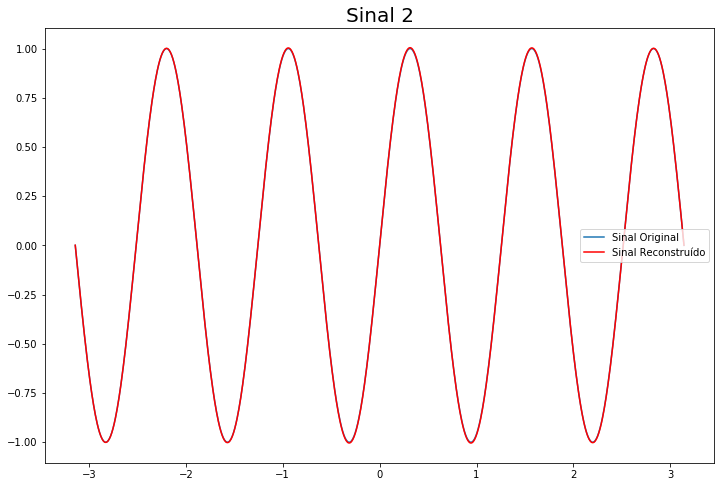

In [45]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,1])
plt.plot(x, decod[:,1], color = 'r')
plt.title("Sinal 2", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

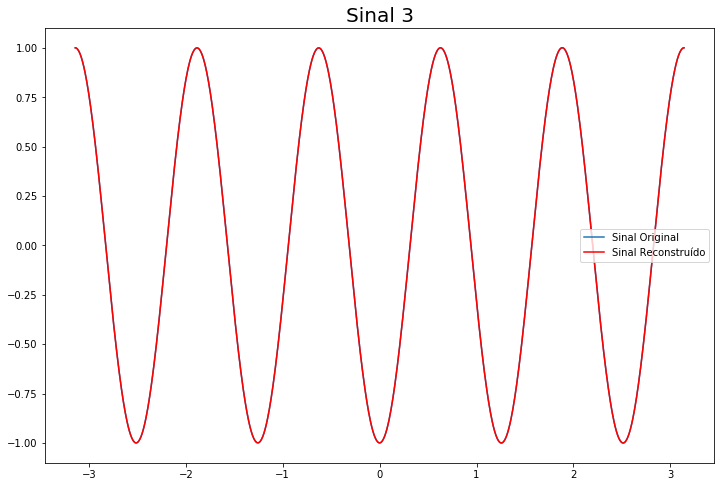

In [46]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,2])
plt.plot(x, decod[:,2], color = 'r')
plt.title("Sinal 3", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

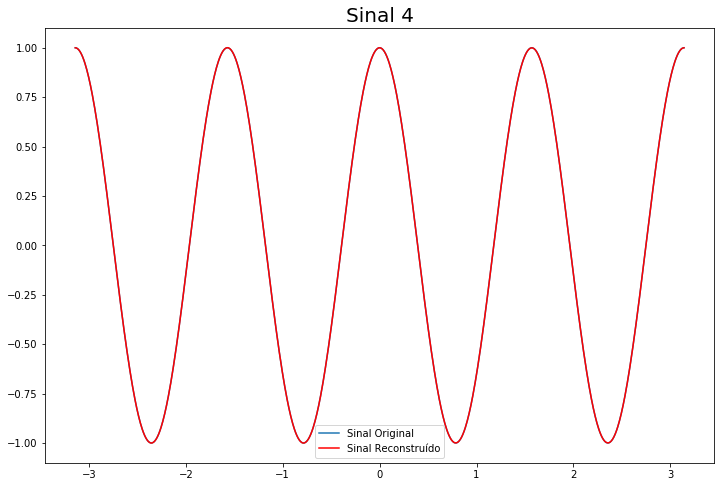

In [47]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,3])
plt.plot(x, decod[:,3], color = 'r')
plt.title("Sinal 4", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

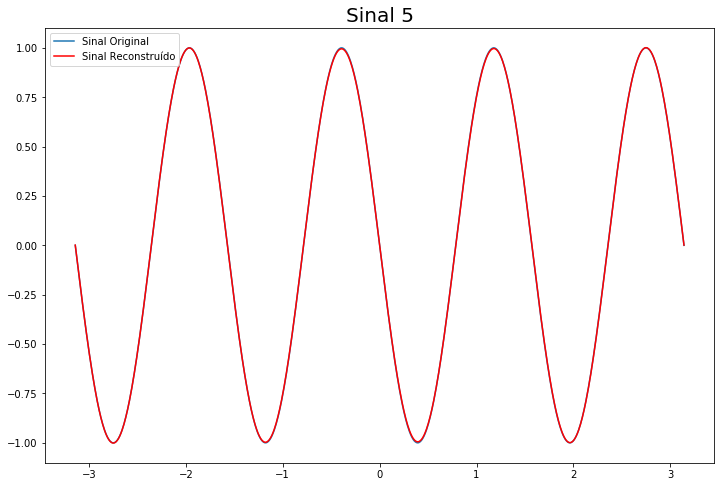

In [48]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,4])
plt.plot(x, decod[:,4], color = 'r')
plt.title("Sinal 5", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

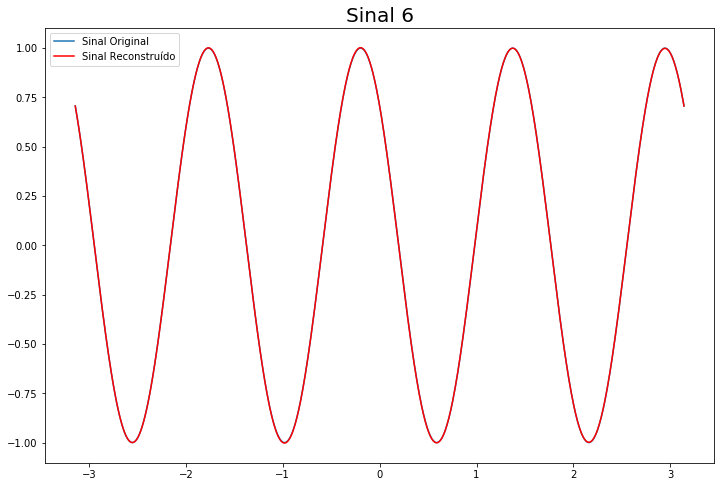

In [49]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,5])
plt.plot(x, decod[:,5], color = 'r')
plt.title("Sinal 6", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

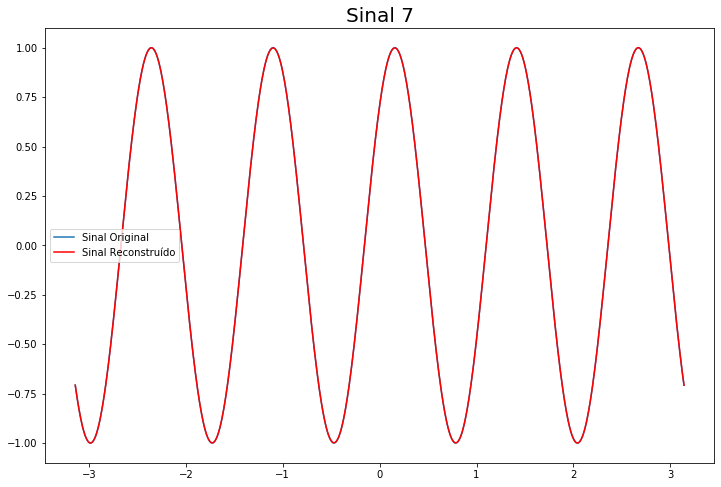

In [50]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,6])
plt.plot(x, decod[:,6], color = 'r')
plt.title("Sinal 7", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

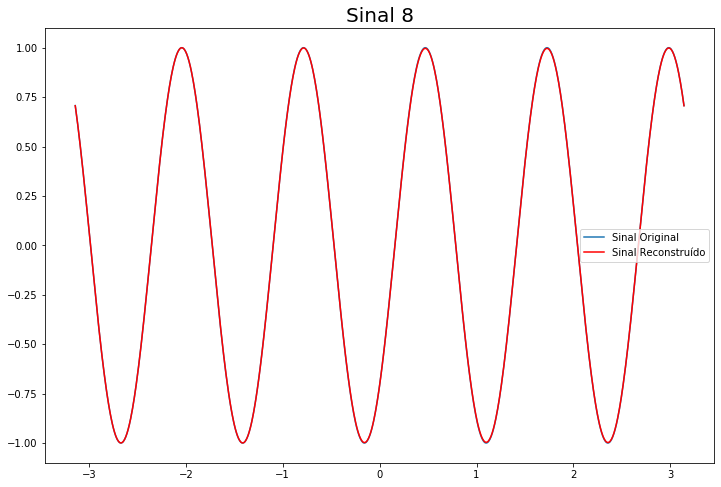

In [51]:
plt.figure(figsize = (12,8))
plt.plot(x, df[:,7])
plt.plot(x, decod[:,7], color = 'r')
plt.title("Sinal 8", fontsize = 20)
plt.legend(['Sinal Original', 'Sinal Reconstruído'])
plt.show()

### __Teste - Reconstrução de Sinais com Dado Espúrio__

In [52]:
#Escolhendo amostra
real = df[370]
real

array([ 0.61290705,  0.80901699,  0.58778525, -0.9921147 , -0.12533323,
       -0.79015501,  0.15643447,  0.98768834])

In [53]:
# Erro médio quadrático
mse = lambda x,y: ((x-y)**2).mean()

In [54]:
#Erro médio absoluto
mae = lambda x,y: abs(((x-y)).mean())

In [55]:
#Amostra com dado espúrio
missing= df[370].copy()
missing[2] = 10
print("Vetor original: {}".format(real))
print("Vetor espúrio: {}".format(missing))

Vetor original: [ 0.61290705  0.80901699  0.58778525 -0.9921147  -0.12533323 -0.79015501
  0.15643447  0.98768834]
Vetor espúrio: [ 0.61290705  0.80901699 10.         -0.9921147  -0.12533323 -0.79015501
  0.15643447  0.98768834]


In [56]:
param = missing

#Erro inicial 
erro = mse(missing ,real)


while erro>0.001:
  
    #Reconstroi o vetor
    vetor_reconstruido = decoder.predict(encoder.predict(np.expand_dims(param,0)))
   
    #Calcula erro
    erro = mae(param[2], vetor_reconstruido[0,2])

    print(erro, param[2], vetor_reconstruido[0,2])

    #Substitui valor reconstruído
    param[2] = vetor_reconstruido[0,2]



vetor_reconstruido

1.8717021942138672 10.0 8.128298
1.4993467330932617 8.128297805786133 6.628951
1.2010679244995117 6.628951072692871 5.427883
0.9621286392211914 5.427883148193359 4.4657545
0.7707233428955078 4.465754508972168 3.6950312
0.617396354675293 3.69503116607666 3.0776348
0.49457216262817383 3.077634811401367 2.5830626
0.3961825370788574 2.5830626487731934 2.18688
0.31736624240875244 2.186880111694336 1.8695139
0.25422966480255127 1.8695138692855835 1.6152842
0.20365333557128906 1.6152842044830322 1.4116309
0.16313862800598145 1.4116308689117432 1.2484922
0.1306840181350708 1.2484922409057617 1.1178082
0.10468590259552002 1.117808222770691 1.0131223
0.08385962247848511 1.013122320175171 0.9292627
0.0671766996383667 0.9292626976966858 0.862086
0.053812623023986816 0.8620859980583191 0.8082734
0.04310727119445801 0.8082733750343323 0.7651661
0.03453153371810913 0.7651661038398743 0.73063457
0.027661800384521484 0.7306345701217651 0.70297277
0.022158682346343994 0.7029727697372437 0.6808141
0.0177

array([[ 0.60621214,  0.81277007,  0.5955857 , -0.98807174, -0.12540874,
        -0.7902339 ,  0.15188128,  0.9920061 ]], dtype=float32)

In [57]:
print(real)
print(param)
print(vetor_reconstruido)
print("Erro final = {}".format(mae(param[2], real[2])))

[ 0.61290705  0.80901699  0.58778525 -0.9921147  -0.12533323 -0.79015501
  0.15643447  0.98768834]
[ 0.61290705  0.80901699  0.5955857  -0.9921147  -0.12533323 -0.79015501
  0.15643447  0.98768834]
[[ 0.60621214  0.81277007  0.5955857  -0.98807174 -0.12540874 -0.7902339
   0.15188128  0.9920061 ]]
Erro final = 0.007800451557318566


#### __Função POCS: Projection Onto Convex Sets__  

In [58]:
def POCS (vetor_real, pos, valor_aleatorio ,encoder, decoder, verbose = False):

  
  
    erro = abs(vetor_real[pos] - valor_aleatorio)
    vetor_reconstruido = vetor_real.copy()
    vetor_reconstruido[pos] = valor_aleatorio

    count = 0
    vetor_erro = []
    vetor_valores = []


    while erro>0.001:
        count = count+1
        vetor_suporte = decoder.predict(encoder.predict(np.expand_dims(vetor_reconstruido,0)))
        erro = mae(vetor_reconstruido[pos] ,vetor_suporte[0,pos])

        vetor_reconstruido[pos] = vetor_suporte[0,pos]

        vetor_valores.append(vetor_reconstruido[pos])
        vetor_erro.append(erro)

        if verbose==True:
            print("Iteração: {}".format(count))
            print("Valor Real: {}".format(vetor_real[pos]))
            print("Valor Reconstruído no Loop: {}".format(vetor_reconstruido[pos]))
            print("Erro de Reconstrução no loop: {}".format(vetor_real[pos]- vetor_reconstruido[pos]))
            print("Erro de Comparação: {}".format(erro))
            print("---------------------------------------------\n")



    print("Vetores:")
    print("Vetor Real: {}".format(vetor_real))
    print("Vetor Reconstruido {}".format(vetor_reconstruido))
    print("----------------------------------------------------------\n\n")


    fig, ax = plt.subplots(1,2, figsize = (20,6))

    ax[0].set_title("Reconstrução do valor", size = 20)
    ax[0].set_xlabel("Número de Iterações", size = 14)
    ax[0].set_ylabel("Valor Reconstruído", size = 14)
    ax[0].plot(range(1,count+1), vetor_valores, 'o')
    ax[0].hlines(vetor_real[pos], xmin=1, xmax=count+1, color = 'red')
    ax[0].legend(["Valor Reconstruído", "Valor Real"], loc = "center right")

    ax[1].set_title("Erro de reconstrução", size = 20)
    ax[1].set_xlabel("Número de Iterações", size = 14)
    ax[1].set_ylabel("Erro Absoluto", size = 14)
    ax[1].plot(range(1,count+1), vetor_erro, linewidth = 3)

    return vetor_reconstruido

Iteração: 1
Valor Real: 0.35641187871325136
Valor Reconstruído no Loop: -4.559831142425537
Erro de Reconstrução no loop: 4.916243021138788
Erro de Comparação: 4.440168857574463
---------------------------------------------

Iteração: 2
Valor Real: 0.35641187871325136
Valor Reconstruído no Loop: -2.2269582748413086
Erro de Reconstrução no loop: 2.58337015355456
Erro de Comparação: 2.3328728675842285
---------------------------------------------

Iteração: 3
Valor Real: 0.35641187871325136
Valor Reconstruído no Loop: -1.0012625455856323
Erro de Reconstrução no loop: 1.3576744242988836
Erro de Comparação: 1.2256957292556763
---------------------------------------------

Iteração: 4
Valor Real: 0.35641187871325136
Valor Reconstruído no Loop: -0.3572799265384674
Erro de Reconstrução no loop: 0.7136918052517187
Erro de Comparação: 0.6439826190471649
---------------------------------------------

Iteração: 5
Valor Real: 0.35641187871325136
Valor Reconstruído no Loop: -0.018930211663246155
Err

array([-0.91269159,  0.06279052,  0.99802673,  0.35503814, -0.93432894,
       -0.40864907, -0.66131187,  0.75011107])

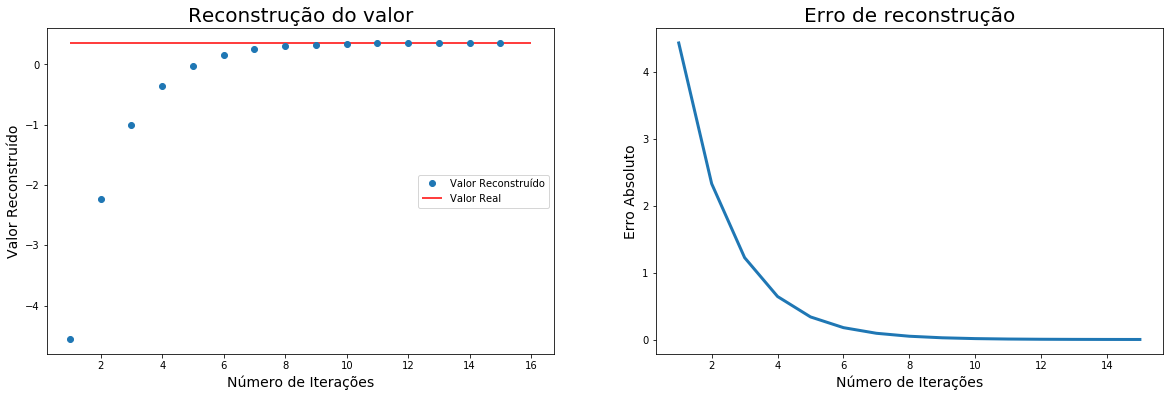

In [59]:
vetor = df[798]
pos = 3


POCS(vetor_real = vetor, pos = pos, valor_aleatorio=-9, encoder=encoder, decoder=decoder, verbose = True)

Iteração: 1
Valor Real: 0.992114701314478
Valor Reconstruído no Loop: -2.8442208766937256
Erro de Reconstrução no loop: 3.8363355780082036
Erro de Comparação: 6.155779123306274
---------------------------------------------

Iteração: 2
Valor Real: 0.992114701314478
Valor Reconstruído no Loop: -0.481613427400589
Erro de Reconstrução no loop: 1.473728128715067
Erro de Comparação: 2.3626074492931366
---------------------------------------------

Iteração: 3
Valor Real: 0.992114701314478
Valor Reconstruído no Loop: 0.42516276240348816
Erro de Reconstrução no loop: 0.5669519389109898
Erro de Comparação: 0.9067761898040771
---------------------------------------------

Iteração: 4
Valor Real: 0.992114701314478
Valor Reconstruído no Loop: 0.7731863260269165
Erro de Reconstrução no loop: 0.21892837528756148
Erro de Comparação: 0.34802356362342834
---------------------------------------------

Iteração: 5
Valor Real: 0.992114701314478
Valor Reconstruído no Loop: 0.9067589044570923
Erro de Recon

array([-0.54112125,  0.61290705, -0.79015501, -0.21200711, -0.97726812,
       -0.84094458,  0.98968989, -0.12533323])

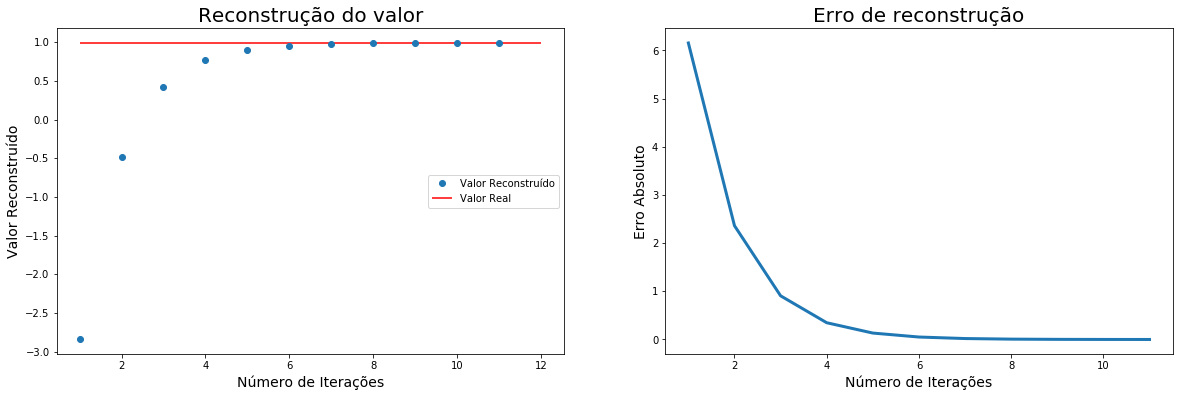

In [60]:
vetor = df[321]
pos = 6
valor = -9

POCS(vetor_real = vetor, pos = pos, valor_aleatorio=valor, encoder=encoder, decoder=decoder, verbose = True)

### __Busca Irrestrita__ 

In [62]:
#Instalando biblioteca pyswarms
# !pip install pyswarms

In [63]:
# Import PySwarms
import pyswarms as ps

In [90]:
def Busca_Irrestrita (vetor_real,  pos, valor_aleatorio, encoder, decoder):

    vetor_suporte = vetor_real.copy()
    vetor_suporte[pos] = valor_aleatorio
    vetor_reconstruido = decoder.predict(encoder.predict(np.expand_dims(vetor_suporte,0)))
    return mse(vetor_suporte[pos], vetor_reconstruido[0,pos])

In [91]:
#Vetor original
real = df[798]
vetor = real.copy()
vetor_reconstruido = real.copy()
pos = 3

#Vetor com dado espúrio
vetor[pos] = 10

In [92]:
Busca_Irrestrita(vetor_real = vetor, pos = pos, valor_aleatorio=valor, encoder=encoder, decoder=decoder)     

19.71509948377411

In [93]:
#Função para otimização
def f(x, vetor, pos, encoder, decoder):

    n_particles = x.shape[0]
    j = [Busca_Irrestrita(vetor,  pos, x[i], encoder, decoder) for i in range(n_particles)]
    return np.array(j)


In [94]:
%%time
# Hiperparâmetros
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}


# Instância do PSO
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=1, options=options)

# Otimização
custo, valor_reconstruido = optimizer.optimize(f, iters=10, vetor = vetor, pos =pos, encoder=encoder, decoder = decoder)

2020-07-14 20:55:32,817 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

pyswarms.single.global_best:   0%|          |0/10
pyswarms.single.global_best:   0%|          |0/10, best_cost=5.52e-6
pyswarms.single.global_best:  10%|█         |1/10, best_cost=5.52e-6
pyswarms.single.global_best:  10%|█         |1/10, best_cost=1.46e-8
pyswarms.single.global_best:  20%|██        |2/10, best_cost=1.46e-8
pyswarms.single.global_best:  20%|██        |2/10, best_cost=1.46e-8
pyswarms.single.global_best:  30%|███       |3/10, best_cost=1.46e-8
pyswarms.single.global_best:  30%|███       |3/10, best_cost=1.46e-8
pyswarms.single.global_best:  40%|████      |4/10, best_cost=1.46e-8
pyswarms.single.global_best:  40%|████      |4/10, best_cost=1.46e-8
pyswarms.single.global_best:  50%|█████     |5/10, best_cost=1.46e-8
pyswarms.single.global_best:  50%|█████     |5/10, best_cost=1.46e-8
pyswarms.single.global_best:  60%|██████    |6/10, best_cost=1.46e-

CPU times: user 1min 18s, sys: 1.02 s, total: 1min 19s
Wall time: 1min 19s


In [95]:
vetor_reconstruido[pos] = valor_reconstruido
print("Vetor Original: {}".format(real))
print("Vetor Reconstruido: {}".format(vetor_reconstruido))
print("Erro: {}".format(real[pos] - vetor_reconstruido[pos]) )

Vetor Original: [-0.91269159  0.06279052  0.99802673  0.35641188 -0.93432894 -0.40864907
 -0.66131187  0.75011107]
Vetor Reconstruido: [-0.91269159  0.06279052  0.99802673  0.35589289 -0.93432894 -0.40864907
 -0.66131187  0.75011107]
Erro: 0.0005189869024532778


### __Busca Restrita__

In [96]:
def Busca_Restrita (vetor_real,  pos, valor_aleatorio, encoder, decoder):

    vetor_suporte = vetor_real.copy()
    vetor_suporte[pos] = valor_aleatorio
    vetor_reconstruido = decoder.predict(encoder.predict(np.expand_dims(vetor_suporte,0)))
    return mse(vetor_suporte, vetor_reconstruido)


In [97]:
def g(x,  vetor,  pos, encoder, decoder):

    n_particles = x.shape[0]
    j = [Busca_Restrita(vetor,  pos, x[i], encoder, decoder) for i in range(n_particles)]
    return np.array(j)


In [98]:
%%time
# Hiperparâmetros
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Instância PSO
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=1, options=options)

# Otimização
custo, valor_reconstruido2= optimizer.optimize(g, 
                                               iters=10, 
                                               vetor = vetor,
                                               pos = pos,
                                               encoder = encoder,
                                               decoder =  decoder)

2020-07-14 20:59:12,441 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

pyswarms.single.global_best:   0%|          |0/10
pyswarms.single.global_best:   0%|          |0/10, best_cost=4.59e-5
pyswarms.single.global_best:  10%|█         |1/10, best_cost=4.59e-5
pyswarms.single.global_best:  10%|█         |1/10, best_cost=4.8e-6 
pyswarms.single.global_best:  20%|██        |2/10, best_cost=4.8e-6
pyswarms.single.global_best:  20%|██        |2/10, best_cost=4.8e-6
pyswarms.single.global_best:  30%|███       |3/10, best_cost=4.8e-6
pyswarms.single.global_best:  30%|███       |3/10, best_cost=4.61e-6
pyswarms.single.global_best:  40%|████      |4/10, best_cost=4.61e-6
pyswarms.single.global_best:  40%|████      |4/10, best_cost=4.61e-6
pyswarms.single.global_best:  50%|█████     |5/10, best_cost=4.61e-6
pyswarms.single.global_best:  50%|█████     |5/10, best_cost=3.79e-6
pyswarms.single.global_best:  60%|██████    |6/10, best_cost=3.79e-6
p

CPU times: user 1min 18s, sys: 929 ms, total: 1min 19s
Wall time: 1min 18s


In [99]:
vetor_reconstruido[pos] = valor_reconstruido2
print("Vetor Original: {}".format(real))
print("Vetor Reconstruido: {}".format(vetor_reconstruido))
print("Erro: {}".format(real[pos] - vetor_reconstruido[pos]))

Vetor Original: [-0.91269159  0.06279052  0.99802673  0.35641188 -0.93432894 -0.40864907
 -0.66131187  0.75011107]
Vetor Reconstruido: [-0.91269159  0.06279052  0.99802673  0.35415517 -0.93432894 -0.40864907
 -0.66131187  0.75011107]
Erro: 0.0022567055929872404


### __Estudo de Caso: Substituindo Sensor__

In [105]:
missing_start = 470
missing_end = 570

sensor = 6
#valor_aleatorio = -9


df_teste = df.copy()

#Dados com 
df_teste[missing_start:missing_end, sensor] = 0

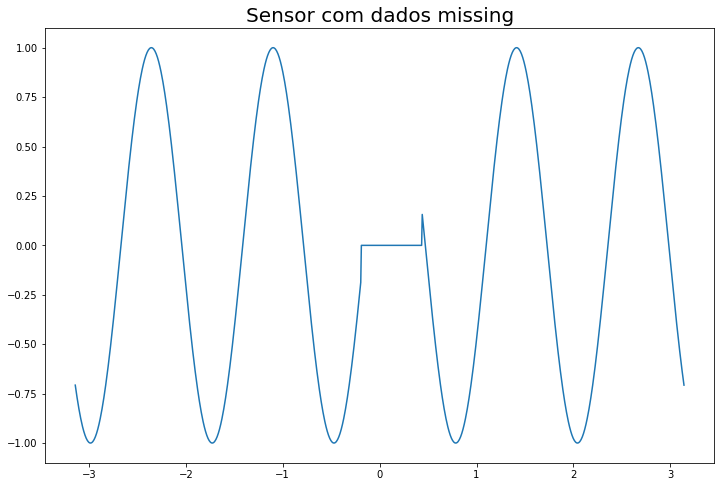

In [106]:
plt.figure(figsize = (12,8))
plt.plot(x, df_teste[:,6])

plt.title("Sensor com dados missing", fontsize = 20)

plt.show()

In [107]:
#hiperparâmetros
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Instância PSO
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=1, options=options)

# Otimização

valores = []
for missing in range(missing_start, missing_end):
    
    
    custo, valor_reconstruido= optimizer.optimize(g, 
                                               iters=10, 
                                               vetor = df_teste[missing,:],
                                               pos = sensor,
                                               encoder = encoder,
                                               decoder =  decoder)
    valores.append(valor_reconstruido)
    
    

2020-07-14 21:13:08,384 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

pyswarms.single.global_best:   0%|          |0/10
pyswarms.single.global_best:   0%|          |0/10, best_cost=0.0027
pyswarms.single.global_best:  10%|█         |1/10, best_cost=0.0027
pyswarms.single.global_best:  10%|█         |1/10, best_cost=0.0027
pyswarms.single.global_best:  20%|██        |2/10, best_cost=0.0027
pyswarms.single.global_best:  20%|██        |2/10, best_cost=0.0027
pyswarms.single.global_best:  30%|███       |3/10, best_cost=0.0027
pyswarms.single.global_best:  30%|███       |3/10, best_cost=0.0027
pyswarms.single.global_best:  40%|████      |4/10, best_cost=0.0027
pyswarms.single.global_best:  40%|████      |4/10, best_cost=3.45e-5
pyswarms.single.global_best:  50%|█████     |5/10, best_cost=3.45e-5
pyswarms.single.global_best:  50%|█████     |5/10, best_cost=5.67e-6
pyswarms.single.global_best:  60%|██████    |6/10, best_cost=5.67e-6
pyswar

In [103]:
valores

[array([-0.15178155]),
 array([-0.12391882]),
 array([-0.09269599]),
 array([-0.06113651]),
 array([-0.02984834])]

In [112]:
vetor_valores = np.concatenate(valores, axis=0)

In [113]:
vetor_valores.shape

(100,)

In [114]:
print('Erro Médio Absoluto: {}'.format(mae(vetor_valores, df[missing_start:missing_end, sensor])))

Erro Médio Absoluto: 0.3196406173814095


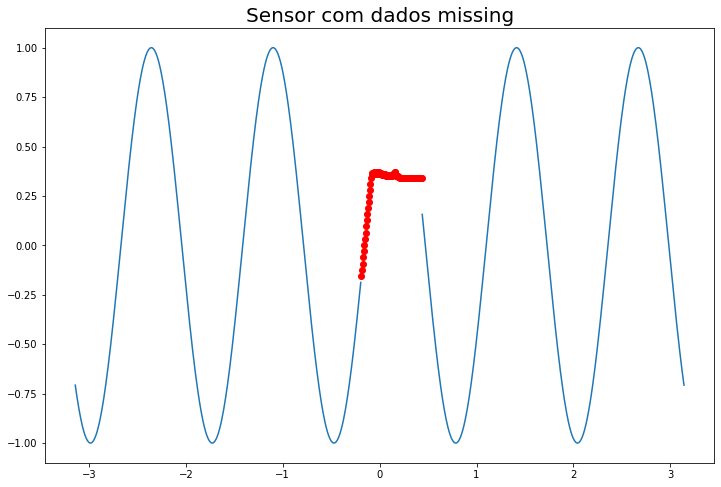

In [117]:
df_teste[missing_start:missing_end, sensor] = np.nan

plt.figure(figsize = (12,8))
plt.plot(x, df_teste[:,6])
plt.plot(x[missing_start:missing_end], vetor_valores, 'ro')
plt.title("Sensor com dados missing", fontsize = 20)

plt.show()


In [116]:
x[missing_start:missing_end]

array([-0.18849556, -0.18221237, -0.17592919, -0.169646  , -0.16336282,
       -0.15707963, -0.15079645, -0.14451326, -0.13823008, -0.13194689,
       -0.12566371, -0.11938052, -0.11309734, -0.10681415, -0.10053096,
       -0.09424778, -0.08796459, -0.08168141, -0.07539822, -0.06911504,
       -0.06283185, -0.05654867, -0.05026548, -0.0439823 , -0.03769911,
       -0.03141593, -0.02513274, -0.01884956, -0.01256637, -0.00628319,
        0.        ,  0.00628319,  0.01256637,  0.01884956,  0.02513274,
        0.03141593,  0.03769911,  0.0439823 ,  0.05026548,  0.05654867,
        0.06283185,  0.06911504,  0.07539822,  0.08168141,  0.08796459,
        0.09424778,  0.10053096,  0.10681415,  0.11309734,  0.11938052,
        0.12566371,  0.13194689,  0.13823008,  0.14451326,  0.15079645,
        0.15707963,  0.16336282,  0.169646  ,  0.17592919,  0.18221237,
        0.18849556,  0.19477874,  0.20106193,  0.20734512,  0.2136283 ,
        0.21991149,  0.22619467,  0.23247786,  0.23876104,  0.24